### Importing required libraries and dataset initially

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mlt
%matplotlib inline
df=pd.read_csv('/Users/kamal/Downloads/heart.csv')

# ------------------------ Data Exploration ---------------------------

### Dataset value counts

In [2]:
print("Dataset Row count is", df.shape[0], ", Dataset Column count is", df.shape[1])

Dataset Row count is 918 , Dataset Column count is 12


### Analyzing datatypes of each attribute

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Taking a look at random 10 samples of data

In [4]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
767,54,F,NAP,108,267,0,LVH,167,N,0.0,Up,0
776,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
403,52,M,ASY,135,0,1,Normal,128,Y,2.0,Flat,1
792,46,M,NAP,150,231,0,Normal,147,N,3.6,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
152,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
20,43,F,TA,100,223,0,Normal,142,N,0.0,Up,0


### observing value ranges of columns with interger type data

In [5]:
df.describe(include=int).T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### observing value ranges of columns with object type data

In [6]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


### Checking for missing values

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Checking for duplicated values

In [8]:
df.duplicated().sum()

0

# ---------------------- VISUALIZATION --------------------------

### As our target variable column is 'HeartDisease', let's visualize it

In [9]:
hd = pd.DataFrame(df['HeartDisease'].value_counts())
hd

,HeartDisease
1,508
0,410


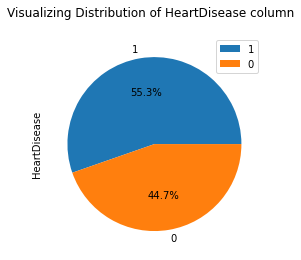

In [10]:
hd.plot(kind='pie', title='Visualizing Distribution of HeartDisease column', figsize=[4,4],
          autopct='%.1f%%', subplots=True,fontsize =10)
plt.show()

##### we have 55.3% of positive cases and 44.7% negative cases w.r.t HeartDisease,
##### So, we can conclude this as a very balanced dataset

### Visualizing  plot to see Gender Distribution

In [11]:
gender = pd.DataFrame(df['Sex'].value_counts())
gender

,Sex
M,725
F,193


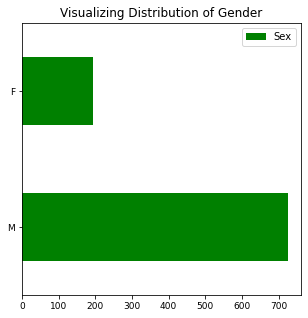

In [12]:
gender.plot.barh( title='Visualizing Distribution of Gender', figsize=[5,5],fontsize=9,color='green')
plt.show()

#### Male patients are dominant in number of this dataset

### Now, Making a plot to see which Chest Pain Type is prominent among Heart Disease Patients

In [13]:
cp = pd.DataFrame(df['ChestPainType'].value_counts())
cp

,ChestPainType
ASY,496
NAP,203
ATA,173
TA,46


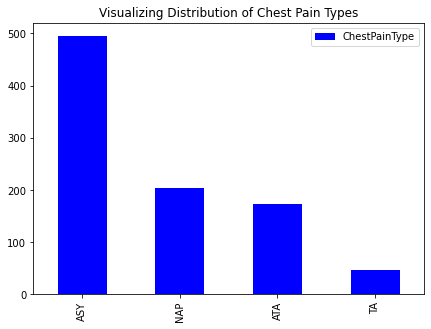

In [14]:
cp.plot.bar(title='Visualizing Distribution of Chest Pain Types', figsize=[7,5],fontsize=10,color='b')
plt.show()

#### We see that the most common type of Chest Pain in Heart Patients is Asymptomatic with around 400 patients.

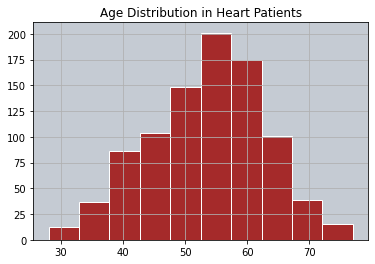

In [15]:
df.hist(column='Age',grid=1,color='Brown',edgecolor='white');
ax=plt.gca()
ax.set_facecolor('#C5CBD3')
plt.title('Age Distribution in Heart Patients');

### We could observe that adults around the age of 60 seem to be the most vulnerable to heart disease

## Plotting a Distribution plot to verify if Age affects Cholesterol levels 

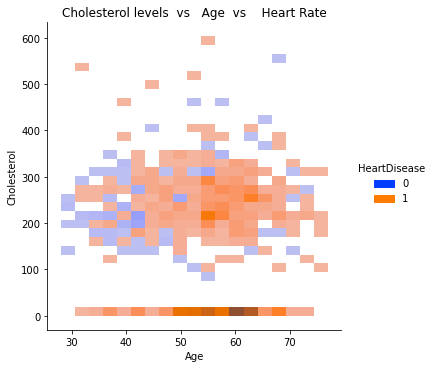

In [16]:
dp=df[df['HeartDisease']==1]
sns.displot(data=df,y='Cholesterol',x='Age', hue='HeartDisease',palette='bright',cmap='coolwarm', height=5);
plt.title('Cholesterol levels  vs   Age  vs    Heart Rate');

#####  age has little impact on our cholesterol statistics.

### Plotting a barplot with other attributes vs 'HeartDisease' column. 


In [17]:
categorical = ['Sex', 'ChestPainType','FastingBS','RestingECG',
                          'ExerciseAngina',  'ST_Slope','HeartDisease']
numeric = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

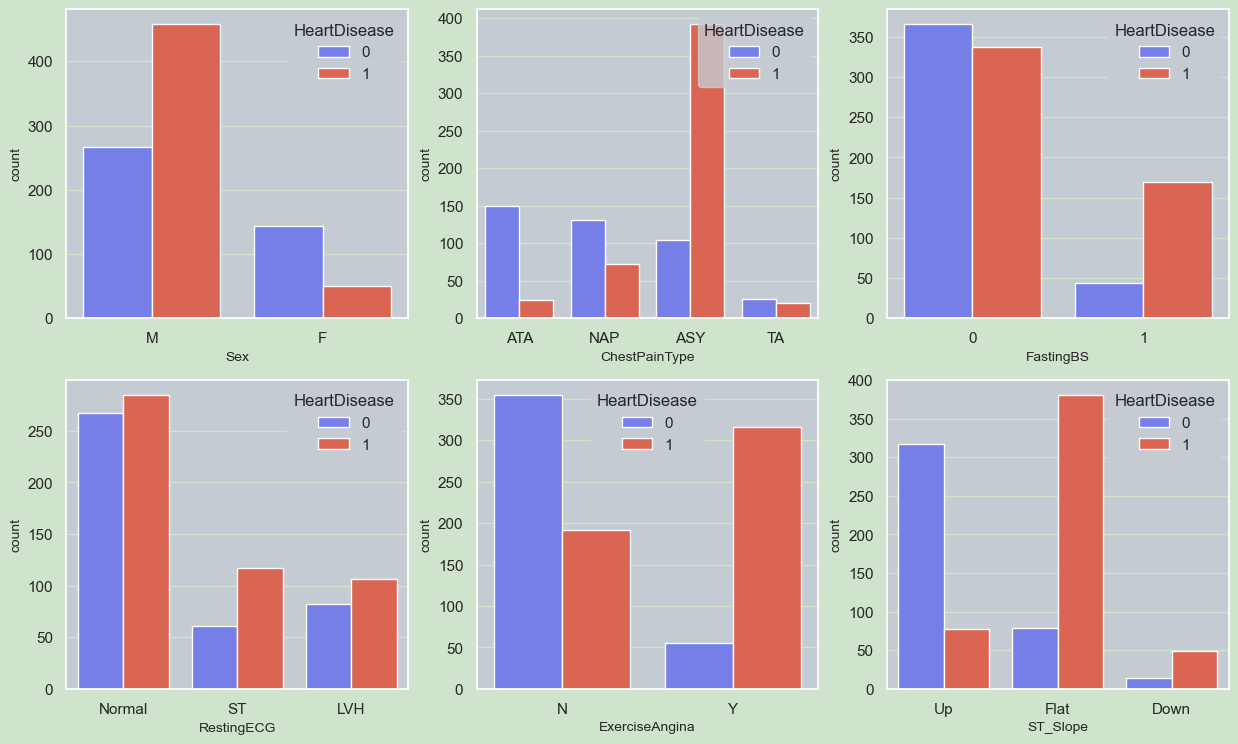

In [18]:
import seaborn as sns
colors = px.colors.qualitative.Plotly
sns.set_theme(rc = {'figure.dpi': 100, 'axes.labelsize': 10, 
                    'axes.facecolor': '#C5CBD3', 'grid.color': '#D0E3CC', 
                    'figure.facecolor': '#D0E3CC'}, font_scale = 1)
fig, ax = plt.subplots(2, 3, figsize = (15, 9))
for indx, (column, axes) in list(enumerate(list(zip(categorical, ax.flatten())))):
    if column not in 'HearDisease':
        sns.countplot(ax = axes, x = df[column], hue = df['HeartDisease'], palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'HeartDisease', loc = 'upper right')
axes_legend[2].legend(title = 'HeartDisease', loc = 'upper right')
plt.show()


###  Pair plot can also be used to understand the best set of features to explain a relationship between two variables.

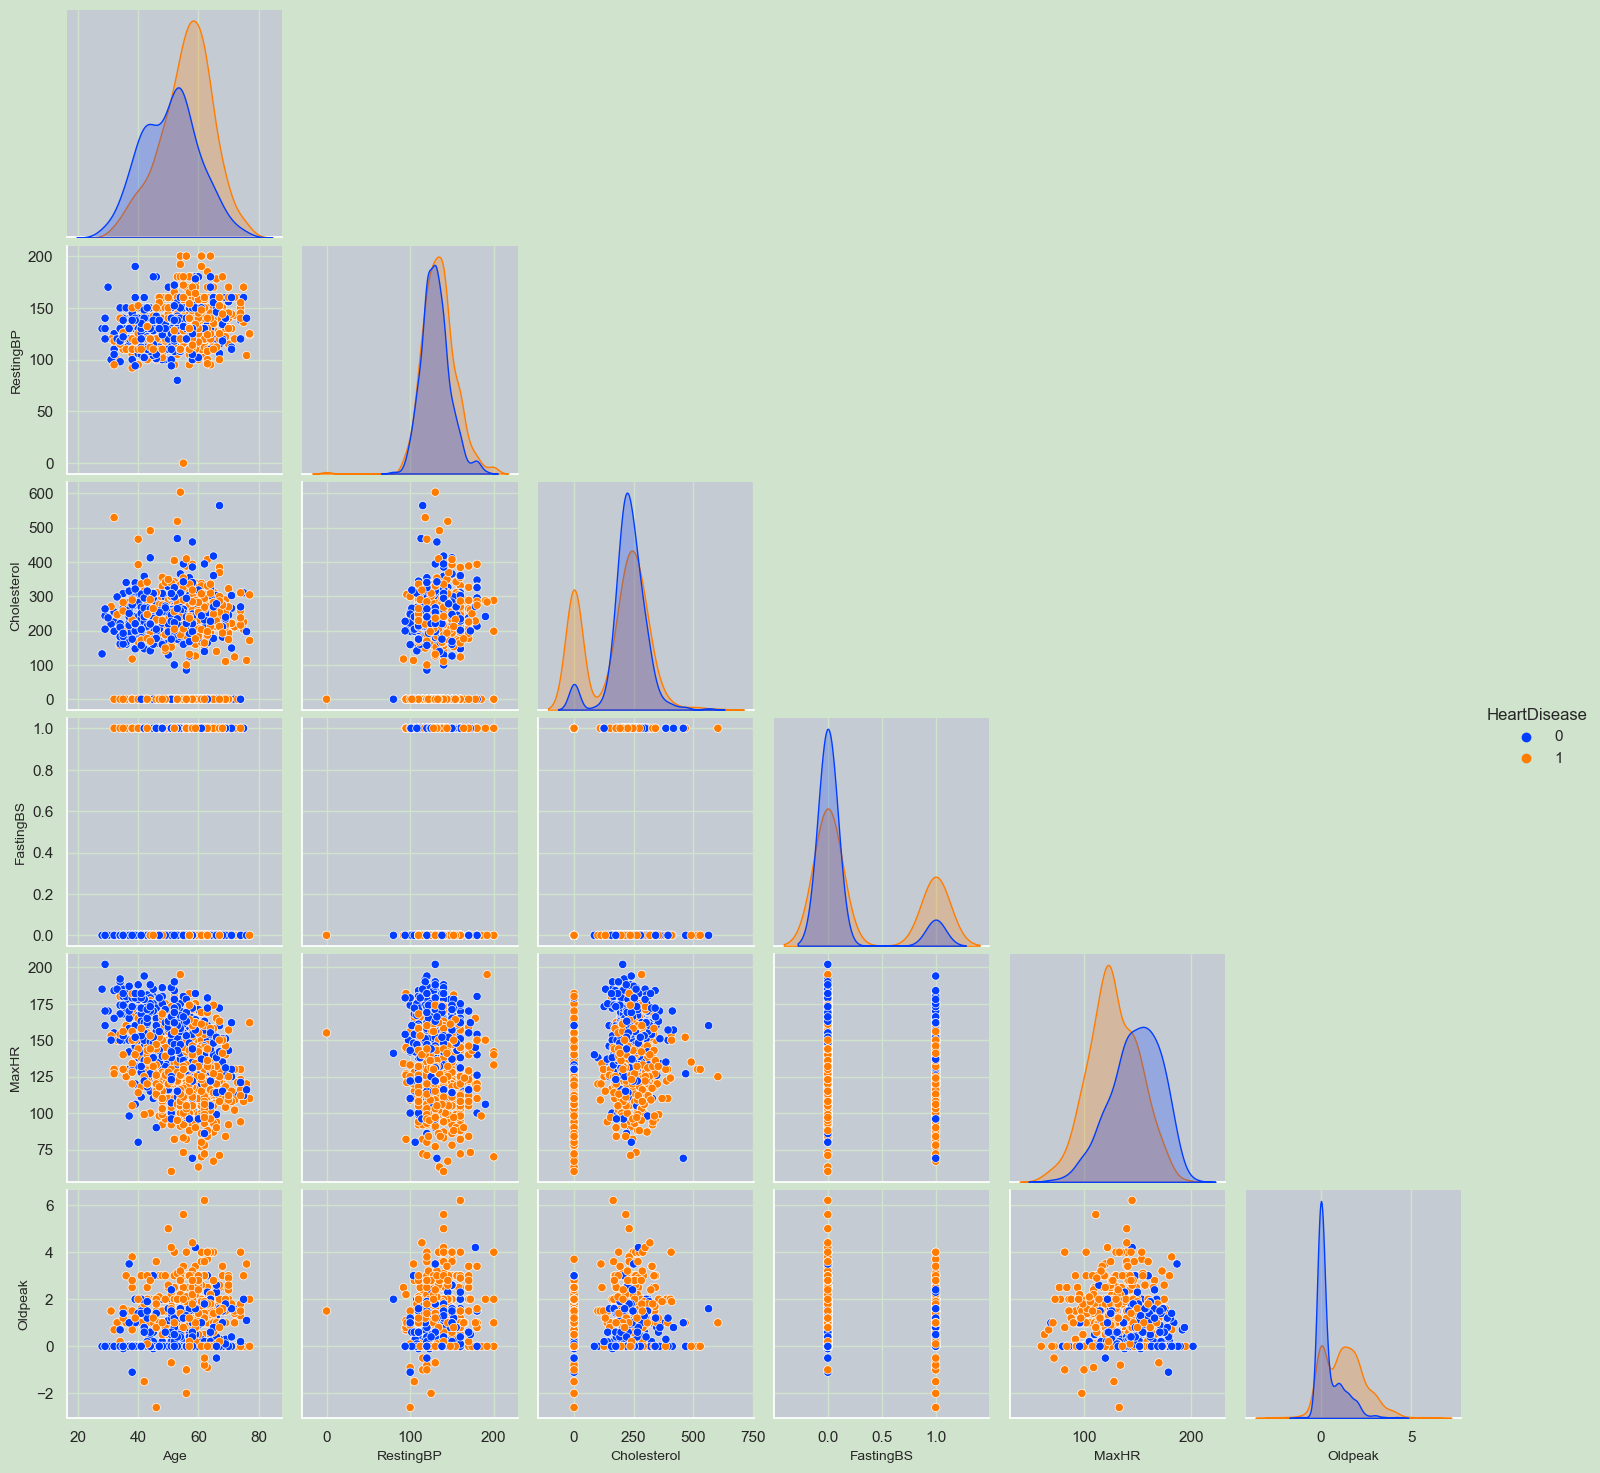

In [19]:
sns.pairplot(df, hue='HeartDisease', palette='bright', corner=True);

### Examining the correlation between variables using HEATMAP.

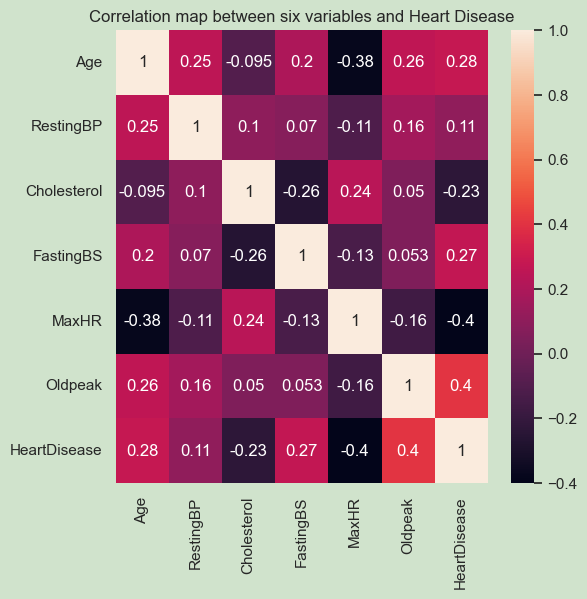

In [20]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90);
plt.title('Correlation map between six variables and Heart Disease');

##### Here we can observe that AGE and FASTING BLOOD SUGAR are the two variables that have the greatest impact on heart disease. While Max Heart Rate seems to have the least impact.

### Before going for Data Preperation, Let's see if we got any outliers in Numeric data that can make impact on Model predictions

In [21]:
def outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outlier values in",i)
        else:
            print("There are outlier values in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outlier values :',x+y)
global a
a = []
for i in numeric:
    outliers(df,i)

No outlier values in Age
There are outlier values in RestingBP
Count of outlier values : 28
There are outlier values in Cholesterol
Count of outlier values : 183
There are outlier values in MaxHR
Count of outlier values : 2
There are outlier values in Oldpeak
Count of outlier values : 16


##### To avoid outlier infulence on our models we have to pre process our data with feature scaling after converting them to numerical labels.

### ------------------------------- PRE PROCESSING OF DATA ------------------------------------

### LABEL ENCODING 
### to convert non-numerical columns to numerical labels.
##### Label Encoding helps in converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [22]:
def LE(c1):
    from sklearn import preprocessing
    l_encode = preprocessing.LabelEncoder()
    df[c1]= l_encode.fit_transform(df[c1])
    df[c1].unique()

In [23]:
LE("Sex")
LE("ChestPainType")
LE("RestingECG")
LE("ExerciseAngina")
LE("ST_Slope")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### Scaling using StandardScaler
#### StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values for appropriate model training.

In [24]:
f_scaler = StandardScaler()
f_scaler.fit(df.drop('HeartDisease',axis = 1))

<IPython.core.display.Javascript object>

StandardScaler()

In [25]:
features_scaled = f_scaler.transform(df.drop('HeartDisease',axis = 1))
df_scaled = pd.DataFrame(features_scaled,columns = df.columns[:-1])
df_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


### Splitting Data for Model Evaluation by using Train Test Split Method

In [26]:
X = df_scaled
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108)

<IPython.core.display.Javascript object>

In [27]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
663,1.324756,0.515952,0.229032,1.491752,0.431746,-0.551341,0.017255,-0.660578,1.214246,-0.832432,-0.596078
202,-1.220994,0.515952,1.275059,1.491752,-0.473815,-0.551341,0.017255,0.361175,-0.823556,-0.832432,1.052114
580,-0.266338,0.515952,-0.816995,-0.075471,-0.428079,1.813758,-1.566710,-0.267596,1.214246,0.105664,-0.596078
793,1.430829,0.515952,-0.816995,-0.399724,0.504923,1.813758,0.017255,1.029244,-0.823556,-0.644813,-0.596078
845,0.794391,-1.938163,-0.816995,0.681120,0.989718,-0.551341,-1.566710,0.361175,1.214246,0.105664,-0.596078


In [28]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
491,2.279412,0.515952,-0.816995,2.032174,0.038422,1.813758,1.601219,-1.132156,-0.823556,-0.832432,-0.596078
353,0.476173,0.515952,-0.816995,-0.129513,-1.818435,-0.551341,1.601219,-1.446542,1.214246,0.105664,-0.596078
655,-1.433140,0.515952,-0.816995,1.059415,0.221363,-0.551341,0.017255,1.736612,-0.823556,-0.832432,1.052114
657,-1.008848,0.515952,1.275059,-0.129513,0.312834,-0.551341,0.017255,1.658016,1.214246,-0.457194,1.052114
805,0.051881,0.515952,-0.816995,0.410909,0.367716,-0.551341,0.017255,0.911350,-0.823556,0.293283,1.052114


### ---------------------------- MODEL TRAINING AND PREDICTION ------------------------------
##### We are going to train data with 4 classification models and predict results.
##### ~ 1. DecisionTree Classifier 
##### ~ 2. RandomForest Classifier 
##### ~ 3. KNN Classification 
##### ~ 4. Logistic Regression

### 1.  DecisionTree Classifier
>##### A Decision Tree is a supervised Machine learning algorithm.
>##### It is used in both classification and regression algorithms.
>##### Decision trees and Random forest both belong to tree methods.
>##### Decision trees make predictions by going through each and every feature in the data set, one-by-one.


<img src="https://i.stack.imgur.com/GBqbQ.png" width="400px">

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=40,max_depth=5)
dt.fit(X_train,y_train)  
y_predicted_dt = dt.predict(X_test)
y_predicted_dt

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [30]:
dt.score(X_test,y_test)

0.8369565217391305

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predicted_dt))

[[100  25]
 [ 20 131]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_dt))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       125
           1       0.84      0.87      0.85       151

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [33]:
print("DecisionTree model Accuracy:",round(dt.score(X_test,y_test)*100),'%')

DecisionTree model Accuracy: 84 %


### 2. RandomForest Classifier
>##### Random forest is a Supervised Machine Learning Algorithm used for Classification and Regression problems.
>##### It performs better results for classification problems.
>##### It can handle the dataset containing categorical variables as in the case of classification.
>##### Random forests are a collection of decision trees being grouped together and trained together that use random orders of the features in the given data sets.

<img src="https://editor.analyticsvidhya.com/uploads/860360_YEwFetXQGPB8aDFV.png" width="500px">

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators =20, random_state = 0)
rf.fit(X_train,y_train)  
y_predicted_rf = rf.predict(X_test)
y_predicted_rf

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [35]:
rf.score(X_test,y_test)

0.8514492753623188

In [36]:
print(confusion_matrix(y_test,y_predicted_rf))

[[106  19]
 [ 22 129]]


In [37]:
print(classification_report(y_test,y_predicted_rf))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       125
           1       0.87      0.85      0.86       151

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [38]:
print("RandomForest model Accuracy:",round(rf.score(X_test,y_test)*100),'%')

RandomForest model Accuracy: 85 %


### 3. K-Nearest Neighbour Algorithm
> #### K-Nearest Neighbour is simplest algorithm based on Supervised Learning.
> #### It assumes the similarity between the new case and available cases and put the new case into the category that is most similar to the available categories.
> #### K-NN is used for Regression and Classification but mostly used for Classification problems.


<img src="https://www.theclickreader.com/wp-content/uploads/2020/08/KNN-Classification-1-1024x576.png" width="500px">

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

#### How K value is selected in the K-NN :
>#### There is no particular way to determine 'K', most preferred value for K is 5.
>#### low K values like 1,2  can be noisy, has some outlier effects in model.

In [41]:
y_predicted_knn = knn.predict(X_test)
y_predicted_knn

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [42]:
knn.score(X_test,y_test)

0.8115942028985508

In [43]:
print(confusion_matrix(y_test,y_predicted_knn))

[[106  19]
 [ 33 118]]


In [44]:
print(classification_report(y_test,y_predicted_knn))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       125
           1       0.86      0.78      0.82       151

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.81      0.81       276



In [45]:
print("k-NN model Accuracy:",round(knn.score(X_test,y_test)*100),'%')

k-NN model Accuracy: 81 %


### 4. Logistic Regression
> #### Logistic Regression is a supervised learning classification algorithm used to predict the probability of a target variable. 
> #### It uses a logistic function to model the dependent variable. 
> #### There could only be two possible classes, for example in our case it’s either heart failure occurs or not. 

<img src="https://www.equiskill.com/wp-content/uploads/2018/07/WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg" width="500px">

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic = LogisticRegression(random_state=100, solver='liblinear')
logistic.fit(X_train,y_train)
y_predicted_lr = logistic.predict(X_test)

In [48]:
y_predicted_lr

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [49]:
logistic.score(X_test,y_test)

0.8115942028985508

In [50]:
print(classification_report(y_test,y_predicted_lr))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       125
           1       0.83      0.82      0.83       151

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



In [51]:
print("Logistic Regression model Accuracy:",round(logistic.score(X_test,y_test)*100),'%')

Logistic Regression model Accuracy: 81 %


### Let's compare all models accuracy scores

In [52]:
print("DecisionTree        :",round(dt.score(X_test,y_test)*100),'%'),
print("RandomForest        :",round(rf.score(X_test,y_test)*100),'%'),
print("k-NN                :",round(knn.score(X_test,y_test)*100),'%'),
print("LogisticRegression  :",round(logistic.score(X_test,y_test)*100),'%')

DecisionTree        : 84 %
RandomForest        : 85 %
k-NN                : 81 %
LogisticRegression  : 81 %


### We can obsereve Random Forest Classifier is performing better than others with accuracy of 85%

## --------------------------- Feature Importances -------------------------------

### As RandomForest classifier is giving best score, let's see what features are influencing most for the decision

In [53]:
ft = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(ft)

ST_Slope          0.199108
ChestPainType     0.140650
Oldpeak           0.136305
Cholesterol       0.106668
MaxHR             0.088653
ExerciseAngina    0.084797
Age               0.072079
RestingBP         0.070365
Sex               0.043241
FastingBS         0.033259
RestingECG        0.024875
dtype: float64


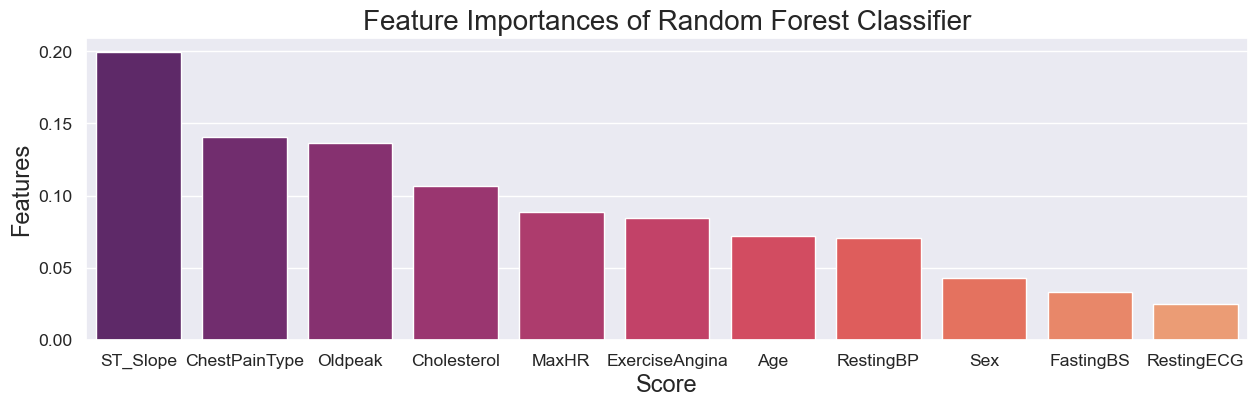

In [54]:
sns.set_theme(style="darkgrid",font_scale=1.15)
plt.figure(figsize = (15,4))
sns.barplot(x = ft.index, y = ft,palette="flare_r", saturation =.99, )
plt.title('Feature Importances of Random Forest Classifier',fontsize=20)
plt.xlabel('Score',fontsize=17)
plt.ylabel('Features',fontsize=17)
plt.show()

#### We can see ST_Slope, ChestPainType, Oldpeak are major features impacting model prediction.